# Predicting Stock Prices with Linear Regression

In [1]:
import numpy as np
import pandas as pd
import datetime as dt 
import mplcyberpunk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("cyberpunk")
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [2]:
data = pd.read_csv('sap_stock.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


<AxesSubplot:>

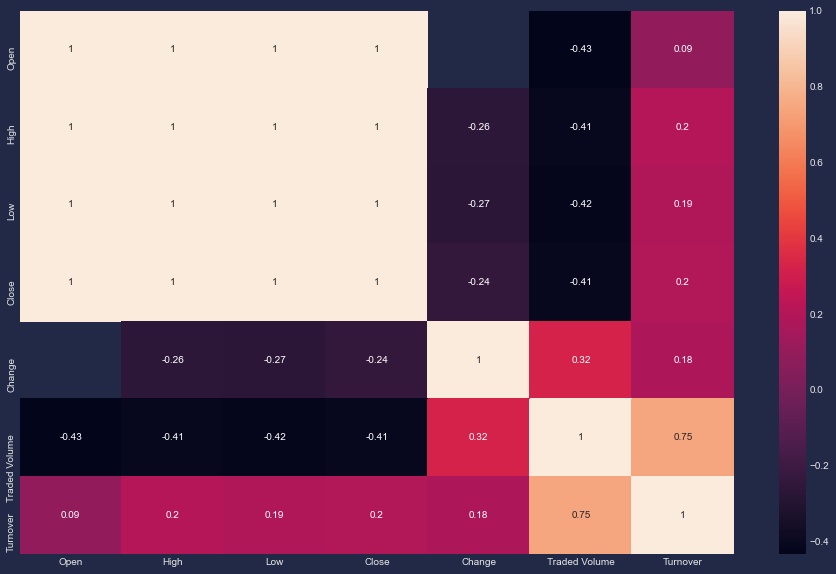

In [4]:
data = data.drop(["Last Price of the Day","Daily Traded Units","Daily Turnover"], axis=1)
pd.DataFrame(data.corr()['Close']).sort_values(by='Close')
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Traded Volume', ylabel='Turnover'>

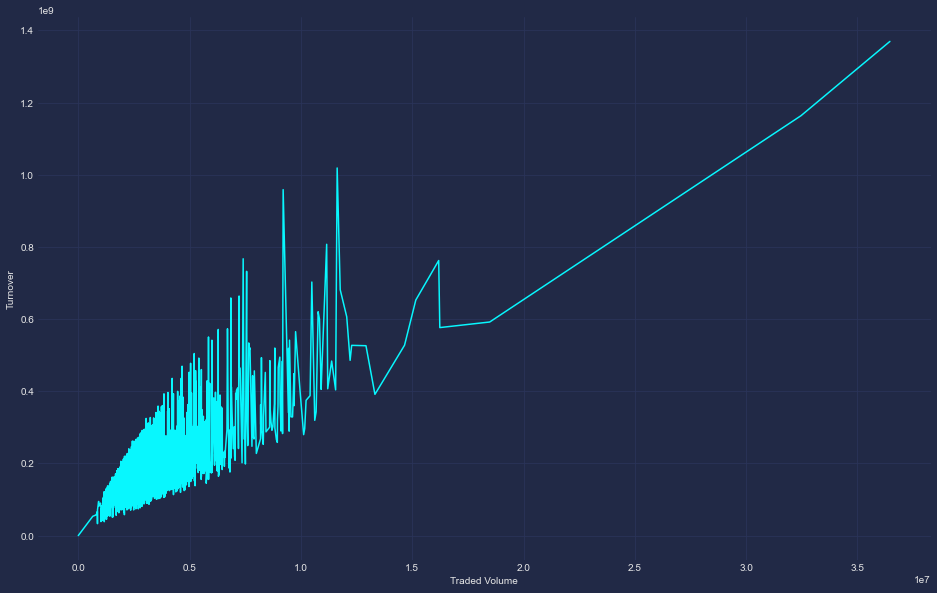

In [5]:
sns.lineplot(x="Traded Volume", y="Turnover",
             data=data)


In [6]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2550 non-null   object 
 1   Open           2242 non-null   float64
 2   High           2543 non-null   float64
 3   Low            2543 non-null   float64
 4   Close          2550 non-null   float64
 5   Change         11 non-null     float64
 6   Traded Volume  2504 non-null   float64
 7   Turnover       2497 non-null   float64
dtypes: float64(7), object(1)
memory usage: 159.5+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09


In [8]:
# Display features in data set
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover'],
      dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [9]:
# Create a new DataFrame with only closing price and date
df = data[['Date', 'Open', 'High', 'Low', 'Close', 'Traded Volume',
       'Turnover']]

df

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [10]:
df.head()

,index,Date,Open,High,Low,Close,Traded Volume,Turnover
0,0,2009-03-09,25.16,25.82,24.48,25.59,5749357.0,145200289.0
1,1,2009-03-10,25.68,26.95,25.68,26.87,7507770.0,198480965.0
2,2,2009-03-11,26.50,26.95,26.26,26.64,5855095.0,155815439.0
3,3,2009-03-12,26.15,26.47,25.82,26.18,6294955.0,164489409.0
4,4,2009-03-13,26.01,26.24,25.65,25.73,6814568.0,176228331.0


In [11]:
# Check data types in columns
for col in df:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2550 non-null   int64  
 1   Date           2550 non-null   object 
 2   Open           2550 non-null   float64
 3   High           2550 non-null   float64
 4   Low            2550 non-null   float64
 5   Close          2550 non-null   float64
 6   Traded Volume  2550 non-null   float64
 7   Turnover       2550 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 159.5+ KB


In [12]:
# double check Check for missing values in the columns
df.isnull().values.any()

False

## Explore the Data

When we take a look at the price movement over time by simply plotting the *Closing price* vs *Time*, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

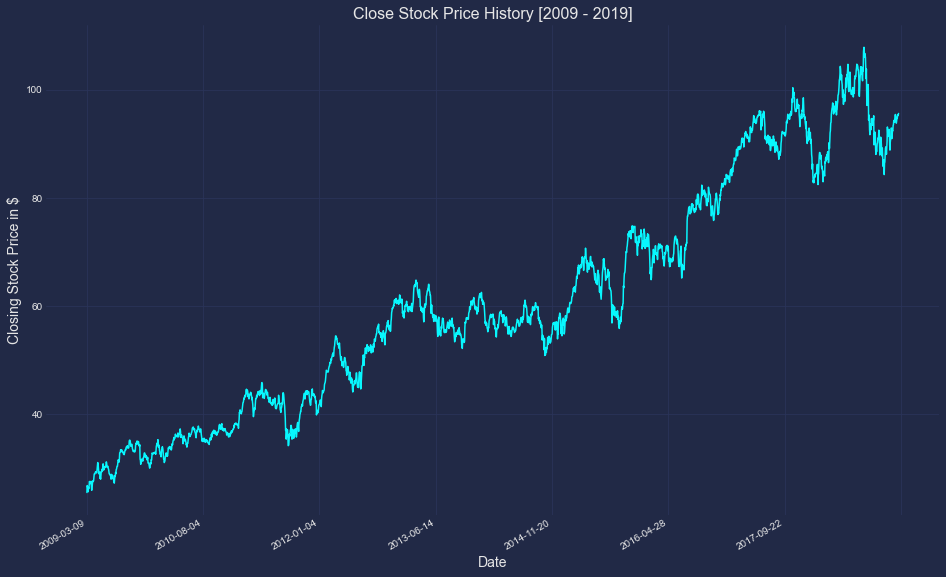

In [13]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year


# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)


# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [14]:

from sklearn.model_selection import train_test_split

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']= df['Date'].map(dt.datetime.toordinal)
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [16]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [17]:
# Reshape index column to 2D array for .fit() method
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X_train = np.array(train["Date"]).reshape(-1,1)
y_train = train['Close']

In [18]:
# Create LinearRegression Object
model = LinearRegression() 
pipe = Pipeline([('scaler', StandardScaler()), ('linreg', LinearRegression())])
# Fit linear model using the train data set
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0276 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

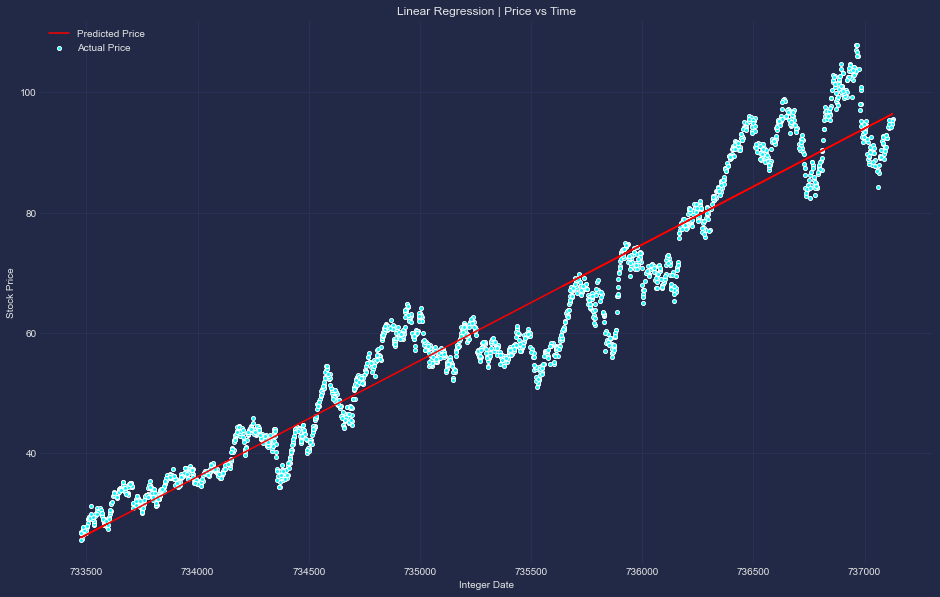

In [19]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, pipe.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
# Create test arrays
X_test = np.array(test['Date']).reshape(-1, 1)
y_test = test['Close']

In [21]:
# Generate array with predicted values
y_pred = pipe.predict(X_test)
print(y_pred)

[85.40999771 74.92599295 28.83884865 82.49455624 34.45734843 26.90809271
 55.57981843 64.2489126  93.15232903 44.34281885 62.83946076 62.31815666
 58.16703139 48.93801799 84.38669706 82.22425041 47.89540978 45.94534628
 30.59583655 76.91467157 51.08115708 52.62576184 36.60048753 54.34413462
 47.35479812 53.84213808 71.89470613 50.57916054 38.35747543 69.577799
 50.96531173 34.51527111 83.51785689 83.90400808 55.00059164 36.754948
 69.32680072 77.33943788 40.53922965 38.82085686 39.78623483 78.26620073
 55.86943182 87.76551996 50.54054542 34.24496528 78.13104781 89.48389275
 87.30213853 61.14039554 50.30885471 60.29086292 69.59710656 91.49187892
 70.94863571 79.03850311 75.65968021 52.00791994 84.11639123 47.85679466
 66.66235753 40.46199941 71.14171131 40.32684649 66.60443485 26.79224735
 47.70233419 85.85407158 64.98259986 95.04446986 48.95732555 28.29823698
 55.79220158 38.55055103 80.15834155 75.17699122 40.38476917 67.29950699
 75.69829533 66.12174586 45.2695817  79.57911477 68.805

In [22]:
# Get number of rows in data set for random sample
df.shape

(2550, 8)

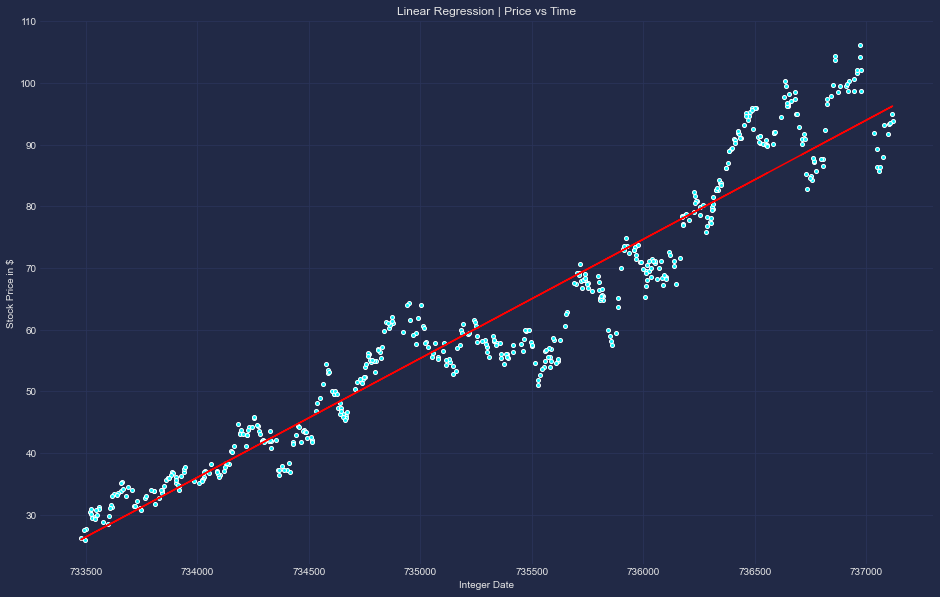

In [23]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, pipe.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

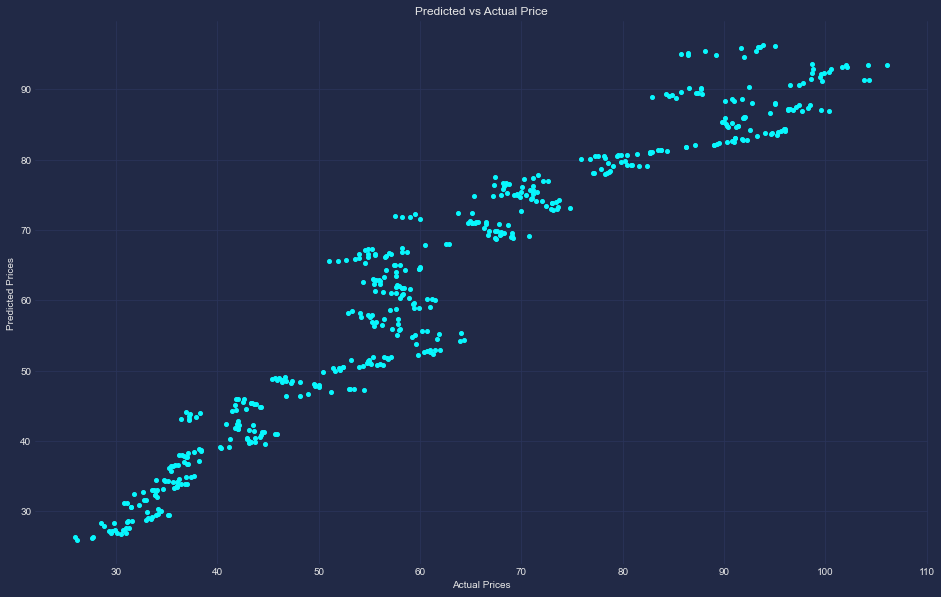

In [24]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

The data points are mostly close to a $y=x$, which indicates, that the predicted values are close to the actual value and the model's performance is accurate.
Yet there are some areas, around 55 to 65, the model seems to be quite random and shows no relationship between the predicted and actual value.  
Also in the area around 85 - 110 the data point are spread out quite heavily.

In [25]:
df.head()

,index,Date,Open,High,Low,Close,Traded Volume,Turnover
0,0,733475,25.16,25.82,24.48,25.59,5749357.0,145200289.0
1,1,733476,25.68,26.95,25.68,26.87,7507770.0,198480965.0
2,2,733477,26.50,26.95,26.26,26.64,5855095.0,155815439.0
3,3,733478,26.15,26.47,25.82,26.18,6294955.0,164489409.0
4,4,733479,26.01,26.24,25.65,25.73,6814568.0,176228331.0


In [26]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [27]:
# Statistical summary of test data
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [28]:


print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  


Mean Squared Error: 30.597585888740443


In [29]:
print(f"R2:  {metrics.r2_score(y_test, y_pred) * 100}")

R2:  92.892652342267


$$

MSE = \frac{1}{n}\sum_{i=i}^{n}(y_{i}-\hat{y_i})^2

$$

The value of $R^2$ shows that are model accounts for above 92% of the differences between the actual stock prices and the predicted prices. 

In [30]:
pdata = pd.read_csv('Book1.csv')

In [31]:
pdata.head()
pdata['pdate'] = pd.to_datetime(pdata['pdate'])
pdata['pdate']= pdata['pdate'].map(dt.datetime.toordinal)

In [32]:
print(pipe.predict(np.array(pdata['pdate']).reshape(-1,1)))

[108.86868239]


### Linear Regression

$$
    Y_{i}= \beta_{0} + \beta_{1}X_{i}
$$